# Employee Performance Analysis

# Project Summary:
Motive of this project is to analyze the current Epmloyee data of INX Future Inc. and find the core underlying causes of this performance issues.Also to build  a model which can predict the employee performance based on factors as inputs.To find out top 3 factors affecting employee performance.
2.To achieve above goal we have used RandomForestClassifier algorithm as it gives 95.27% accuracy

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
Enc=LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import pca
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


# Requirement:Data

In [41]:
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [42]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [43]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [44]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


# Analysis:
1.As there are 3 classes for performance rating this is the classification problem so we can RandomForest Classifier or XGBoost
2.There are few Categorical Variables that needs to be converted to numeric using LabelEncoder

# Data Processing

In [45]:
#Checking if any values in the variables are null 
data.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [46]:
#Encoding the columns values of EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime and Attrition using label encoder

In [47]:
data.EmpNumber=Enc.fit_transform(data.EmpNumber)
data.Gender=Enc.fit_transform(data.Gender)
data.EducationBackground=Enc.fit_transform(data.EducationBackground)
data.MaritalStatus=Enc.fit_transform(data.MaritalStatus)
data.EmpDepartment=Enc.fit_transform(data.EmpDepartment)
data.EmpJobRole=Enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=Enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime=Enc.fit_transform(data.OverTime)
data.Attrition=Enc.fit_transform(data.Attrition)

In [48]:
print(data.shape)

(1200, 28)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

In [50]:
#dropping EmpNumber field -not required since it is unique
#data.drop('EmpNumber',inplace=True,axis=1)
print(data.shape)
data.head()

(1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


## Feature Selection:
By seeing correlation between other features and PerformanceRating the features will be selected

In [51]:
data.corr()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,1.000000,-0.053137,0.025922,0.023819,-0.038128,-0.234279,-0.044182,0.050270,-0.023405,0.005844,...,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.020210,-0.003163
Age,-0.053137,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,0.025922,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,0.023819,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.038128,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.234279,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.044182,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.050270,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,-0.023405,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.005844,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529


In [52]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [53]:
cleaned = data.to_csv('cleaned_dataset.csv',index=False)

# EDA

In [54]:
#analysing data like
#GOAL : 4 classes of performance values(1,2,3,4)
#which features are the driving factors for PerformanceRating
#Departmentwise Performance

In [55]:
#Departmentwise performance
data.groupby('EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment  PerformanceRating
0              3                     17
               4                      2
               2                      1
1              3                    304
               4                     44
               2                     13
2              3                     30
               2                     15
               4                      4
3              3                     38
               2                     10
               4                      6
4              3                    234
               2                     68
               4                     41
5              3                    251
               2                     87
               4                     35
Name: PerformanceRating, dtype: int64

## EDA with visualization

In [56]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
from scipy import stats

In [57]:
List=['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']
for i in List:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(data[i]))+' and '+ str(stats.kurtosis(data[i])))

skewness and Kurtosis for Age: 0.3836646110785685 and -0.4342016798705739
skewness and Kurtosis for Gender: -0.42601432284230467 and -1.8185117967332127
skewness and Kurtosis for EducationBackground: 0.5513749427617737 and -0.65174298239753
skewness and Kurtosis for MaritalStatus: -0.15144003526169916 and -1.119700089850293
skewness and Kurtosis for EmpDepartment: -0.40791122659206125 and -1.505003648253274
skewness and Kurtosis for EmpJobRole: -0.11151335264121637 and -1.25602866999997
skewness and Kurtosis for BusinessTravelFrequency: -1.4010025618647997 and 0.5486513912585655
skewness and Kurtosis for DistanceFromHome: 0.9617520027440261 and -0.2460053857006934
skewness and Kurtosis for EmpEducationLevel: -0.2506601284752214 and -0.6379446256527972
skewness and Kurtosis for EmpEnvironmentSatisfaction: -0.30728009854747024 and -1.2055559189315166
skewness and Kurtosis for EmpHourlyRate: -0.03512091677629664 and -1.1869467386782748
skewness and Kurtosis for EmpJobInvolvement: -0.55714

In [58]:
#conclusion: we can see the Normality for YearsSinceLastPromotion and Attrition  is not statisfied

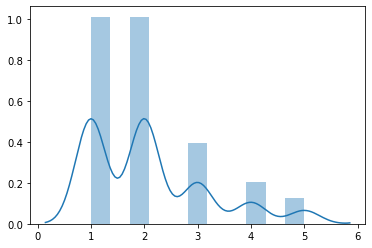

In [59]:
#checking the acclength distribution- it is normal
sns.distplot([data.EmpJobLevel])

## Training the model

In [60]:
X=data.loc[:,:'Attrition']
X.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,32,1,2,2,5,13,2,10,3,...,12,4,10,2,2,10,7,0,8,0
1,1,47,1,2,2,5,13,2,14,4,...,12,4,20,2,3,7,7,1,7,0
2,2,40,1,1,1,5,13,1,5,4,...,21,3,20,2,3,18,13,1,12,0
3,3,41,1,0,0,3,8,2,10,4,...,15,2,23,2,2,21,6,12,6,0
4,4,60,1,2,2,5,13,2,16,4,...,14,4,10,1,3,2,2,2,2,0


In [61]:
#X.drop('TrainingTimesLastYear',axis=1,inplace=True)
#X.head()

In [62]:
#X.drop('ExperienceYearsInCurrentRole',axis=1,inplace=True)
#X.head()

In [63]:
y=data['PerformanceRating']
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Building:RandomForest Classifier

In [66]:
model_rf=RandomForestClassifier(n_estimators=99,max_depth=11)
model_rf.fit(X_train,y_train)
y_predict1=model_rf.predict(X_test)
print(accuracy_score(y_predict1,y_test))
pd.crosstab(y_predict1,y_test)
print(classification_report(y_test,y_predict1))

0.9527777777777777
              precision    recall  f1-score   support

           2       0.89      0.86      0.88        49
           3       0.97      0.97      0.97       281
           4       0.90      0.93      0.92        30

    accuracy                           0.95       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.95      0.95      0.95       360



In [67]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\susha\anaconda3\lib\site-packages (0.23.2)


In [68]:
import sklearn
sklearn.__version__

'0.23.2'

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
y_pred_prob=model_rf.predict_proba(X_test)

In [71]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.9810694123413898

## Visualization

In [74]:
importances= model_rf.feature_importances_
sort=np.argsort(importances)
label=X.columns[sort]

In [75]:
X.shape
ss= range(X.shape[1])
print(ss)

range(0, 27)


<BarContainer object of 27 artists>

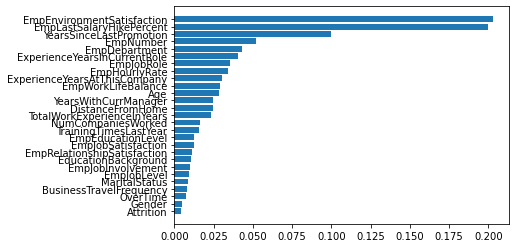

In [76]:
plt.barh(ss,importances[sort],tick_label=label)

### The above figure shows the feature importance for this model.And below are the top 3 features that affect performance the most,
1.EmpLastSalaryHikePercent 2.EmpEnvironmentSatisfaction 3.YearsSinceLastPromotion 

# XGBoost Algorithm

In [77]:
!pip install xgboost

In [78]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()

In [79]:
model_xg.fit(X_train,y_train)
y_predict=model_xg.predict(X_test)
print(accuracy_score(y_predict,y_test))
pd.crosstab(y_predict,y_test)


0.9444444444444444


PerformanceRating,2,3,4
row_0,,,
2,42,8,0
3,7,270,2
4,0,3,28


## Out of thest two algorithms RandomForest Classifier algorithm gives more accuracy.Hence we choose Randomforest Classifier